# Classification with Artificial Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The IRIS dataset

In the following we start using a [dataset](https://archive.ics.uci.edu/dataset/53/iris) (from UCI Machine Learning repository) called IRIS, which contains 3 classes of iris plants (*setosa*, *versicolor*, *virginica*) with 4 features (*sepal length*, *sepal width*, *petal length*, *petal width*).

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Model declaration

The type of prediction model and the working criteria for the model induction algorithm are declared using scikit-learn. In this case, we use a Multi-layer Perceptron (MLP) classifier. The parametrization of this first classifier is arbitrary and will result in subpar performance.

In [6]:
from sklearn.neural_network import MLPClassifier
clf_ANN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

# Adam tiene in considerazione una media mobile delle ultime operaizoni + aggiornamento dove aggiorna con una quantità dinamica i pesi che dipende dal gradiente

#Alpha introduce nella loss function un termine di penalità che incoraggia l'apprendimento ad usare dei pesi piccoli, rete compatta con pochi pesi

#Hidden Layer Il primo layer da 5 neuroni, il secondo da 2, di default 2 neuroni, input e output

## Training and test sets

We split the dataset in a training set (to be used to fit the model) and a test set (to be used to evaluate the quality of the fitted model). In this case, we keep only 10 examples for testing selected randomly from the original dataset (using numpy).

In [7]:
np.random.seed(0)

# Generate a random permutation of the indices of examples that will be later used
# for the training and the test set
indices = np.random.permutation(len(iris.data)) #Si permutano casualmente gli indici (da 0 alla lunghezza della matrice)

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [8]:
# fit the model to the training data
clf_ANN = clf_ANN.fit(iris_X_train, iris_y_train)

Scikit-learn allows to access the network's training set score and loss after the training phase.

In [9]:
print("Training set score: " + str(clf_ANN.score(iris_X_train, iris_y_train)))
print("Training set loss: " + str(clf_ANN.loss_))

Training set score: 0.6714285714285714
Training set loss: 0.5559834895588641


The training loss curve can be plotted to visualize how Loss evolves during training. Beware that this curve is not gathered by all optimizers (Adam does, LBFGS doesn't).

**Adam ** is a popular and efficient ML optimizer that uses the first and second moments of the gradients to adaptively adjust the learning rate for each parameter during training. It combines *Momentum* (accelerates convergence with a moving average of past gradients) and *RMSProp* (uses the decaying moving average of squared gradients) to smooth out oscillations and prevent the vanishing or exploding gradient problems.

In [10]:
clf_ANN_sdg = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
clf_ANN_sdg = clf_ANN_sdg.fit(iris_X_train, iris_y_train)

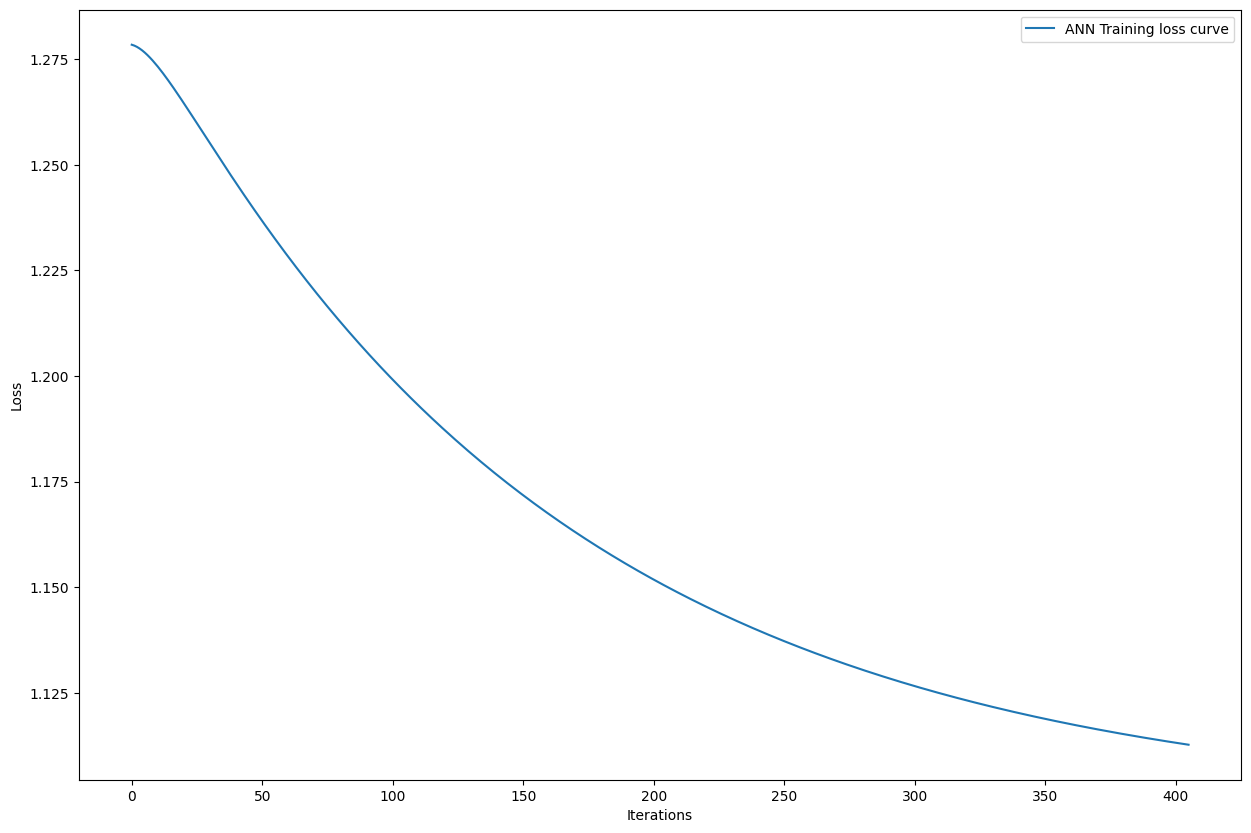

In [11]:
# The learning curve is plotted using Matplotlib
fig, axis = plt.subplots(1, figsize=(15, 10))
axis.set_xlabel("Iterations")
axis.set_ylabel("Loss")
axis.plot(clf_ANN_sdg.loss_curve_, label="ANN Training loss curve")
axis.legend()

Once the model has been trained, it can be used to predict the class of the flowers in the test set.

In [12]:
predicted_y_test = clf_ANN.predict(iris_X_test)

print(iris.target_names)

# print the predictions (class numbers associated to classes names in target names)
print("\nPredictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)

['setosa' 'versicolor' 'virginica']

Predictions:
[2 2 2 0 0 0 2 2 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


Pandas is used to display the test data with corresponding predicted labels.

In [36]:
results_data = []

for i in range(len(iris_y_test)):
    feature_values = [iris_X_test[i][j] for j in range(len(iris.feature_names))]

    results_data.append({
        'Instance': indices_test[i],
        iris.feature_names[0]: feature_values[0],
        iris.feature_names[1]: feature_values[1],
        iris.feature_names[2]: feature_values[2],
        iris.feature_names[3]: feature_values[3],
        'Predicted': iris.target_names[predicted_y_test[i]],
        'True Class': iris.target_names[iris_y_test[i]],
        'Correct': 'Yes' if predicted_y_test[i] == iris_y_test[i] else 'No'
    })

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False, float_format='%.1f'))

 Instance  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Predicted True Class Correct
       88                5.6               3.0                4.1               1.3 virginica versicolor      No
       70                5.9               3.2                4.8               1.8 virginica versicolor      No
       87                6.3               2.3                4.4               1.3 virginica versicolor      No
       36                5.5               3.5                1.3               0.2    setosa     setosa     Yes
       21                5.1               3.7                1.5               0.4    setosa     setosa     Yes
        9                4.9               3.1                1.5               0.1    setosa     setosa     Yes
      103                6.3               2.9                5.6               1.8 virginica  virginica     Yes
       67                5.8               2.7                4.1               1.0 virginica ve

## Performance metrics

Scikit-learn provides several built-in functions to evaluate the quality of the predictions, in this case we use accuracy and F1-score.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [38]:
# print some metrics results
acc_scoreANN = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score ANN: "+ str(acc_scoreANN))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score ANN: "+ str(f1))

Accuracy score ANN: 0.6
F1 score ANN: 0.5


## Cross Validation

Scikit-learn provides several built-in functions to perform cross-validation. In this case we use a $5$-fold cross-validation, and we compute the accuracy and F1-score for each fold.

In [39]:
from sklearn.model_selection import cross_val_score # will be used to separate training and test

In [40]:
iris = load_iris()
clf_ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [41]:
scoresANN = cross_val_score(clf_ANN, iris.data, iris.target, cv=5) # score will be the accuracy
print(scoresANN)
f1_scoresANN = cross_val_score(clf_ANN, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scoresANN)

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Scikit-learn provides built-in facilities to visualize learning curves, by also employing CV on training set of increasing size, allowing to visualize overfitting/underfitting phenomena.

In [42]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle

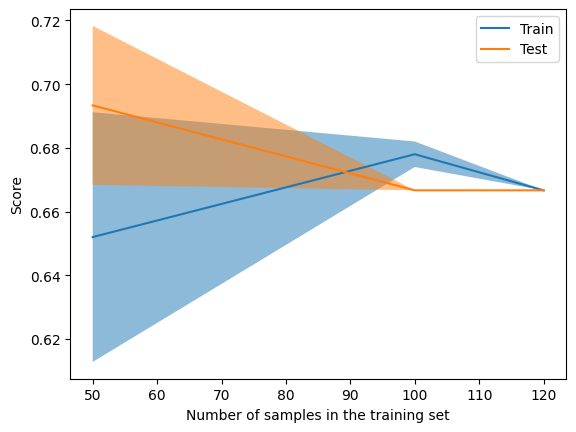

In [43]:
iris_x, iris_y = load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
clf_ANN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)
LearningCurveDisplay.from_estimator(clf_ANN, iris_x, iris_y, train_sizes=[50, 100, 120], cv=5)

P.S. certain optimizers (like Adam) raise several convergence warnings if the maximum number of iterations is not sufficient to reach convergence. This can be visually problematic especially when trying to search for best hyperparameters (try to run the above cell with `max_iter=400`). In this case, it is possible to disable the warnings as follows:

```python
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
```

# Your work: what you have to do

Modify the given Jupyter notebook on ANN on Iris data and perform the following tasks:

1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.
2. build the ROC curve (or coverage curve in coverage space) and plot it for the ANN: you have to build three curves, one for each class, considered in turn as the positive class.
3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the ANN in this condition. In this case we have more examples in the dataset!

**Note:** Be careful in the random sampling when you divide the dataset into training- and test-set: no examples of the training-set should go in the test- set.

4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the ANN in this condition. You should obtain similar results as for step 3.

**Note:** Be careful to the values of the iperparameters you use if you want to obtain the same results as with the step 3: they should be set in a value that is proportionated to the number of examples in the training-set.

5. learn the ANN but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Consider the following hyperparameters:

- hidden_layer_sizes
- activation = {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
- solver = {‘lbfgs’, ‘sgd’, ‘adam’}
- alpha (L2 regularization term)
- batch_size (size of the mini-batch)
- learning_rate = {‘constant’, ‘invscaling’, ‘adaptive’}
- early_stopping: bool
- warm_start: bool
- max_iter

Decide yourself the suitable possible values for each of them.

6. build the ROC curves of best models (obtained after hyperparameter tuning) for both DT and ANN for each of the three classes (with *one-vs-rest* methodology). Compare the two models.

# 1. build and show the confusion matrix obtained by cross validation, where the errors are on the test sets.

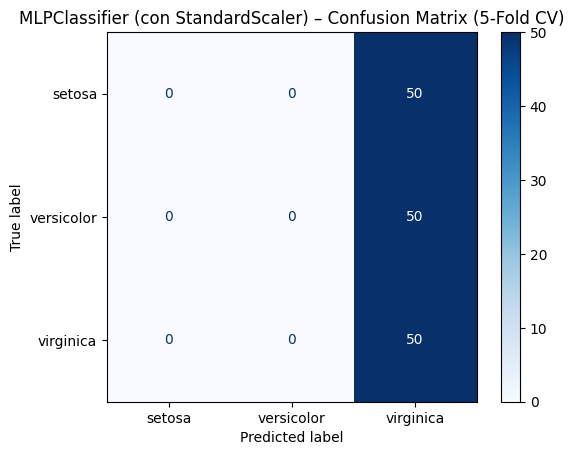

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# =========================
# 1) Dataset
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# =========================
# 2) Pipeline: Scaling + ANN
# =========================
# - StandardScaler normalizza le feature
# - viene applicato SOLO sul training fold
pipeline_ANN = Pipeline([
    ("scaler", StandardScaler()), #Ho dovuto usarlo altrimenti nella confusion matrix mi uscivano tutte previsioni su virginica
    ("mlp", MLPClassifier(
        solver='lbfgs',
        alpha=1e-5,
        hidden_layer_sizes=(5, 2),
        random_state=1,
        max_iter=2000
    ))
])

# ==========================================================
# 3) Predizioni via cross-validation
# ==========================================================
y_pred = cross_val_predict(
    pipeline_ANN,
    X,
    y,
    cv=5
)

# =========================
# 4) Confusion Matrix
# =========================
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    display_labels=class_names,
    cmap="Blues"
)

plt.title("MLPClassifier (con StandardScaler) – Confusion Matrix (5-Fold CV)")
plt.show()


# 2. build the ROC curve (or coverage curve in coverage space) and plot it for the ANN: you have to build three curves, one for each class, considered in turn as the positive class.

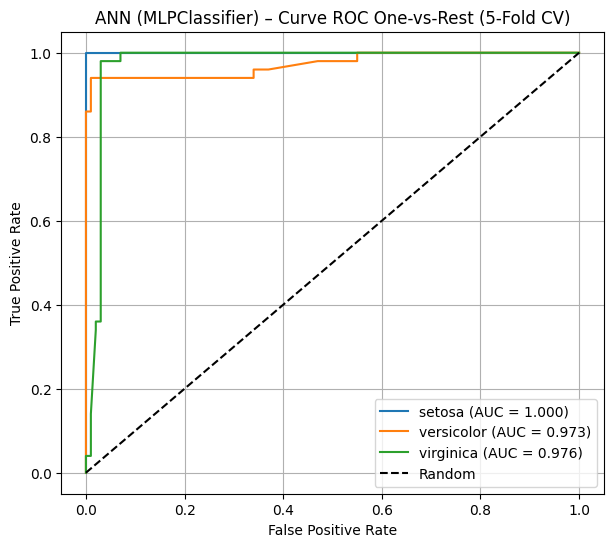

In [13]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# =========================
# 2) Pipeline: scaling + ANN
# =========================
pipeline_ANN = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        solver="lbfgs",
        alpha=1e-5,
        hidden_layer_sizes=(5, 2),
        random_state=1,
        max_iter=2000
    ))
])

# ==========================================================
# 3) Probabilità predette via cross-validation (5-fold)
# ==========================================================
# y_score ha shape (n_samples, n_classes)
# Ogni riga contiene le probabilità predette per le 3 classi,
# ottenute SOLO quando il campione era nel test fold.
y_score = cross_val_predict(
    pipeline_ANN,
    X,
    y,
    cv=5,
    method="predict_proba"
)

# =========================
# 4) Binarizzo le etichette (One-vs-Rest)
# =========================
# Trasformo y in una matrice binaria:
# - colonna i = 1 se il campione appartiene alla classe i, 0 altrimenti
y_bin = label_binarize(y, classes=[0, 1, 2])

# =========================
# 5) Costruisco e plotto le ROC curve
# =========================
plt.figure(figsize=(7, 6))

for i in range(n_classes):
    # Calcolo FPR e TPR per la classe i trattata come positiva
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])

    # Calcolo AUC (area sotto la curva)
    roc_auc = auc(fpr, tpr)

    # Plot della curva ROC
    plt.plot(
        fpr,
        tpr,
        label=f"{class_names[i]} (AUC = {roc_auc:.3f})"
    )

# Linea di riferimento casuale (AUC = 0.5)
plt.plot([0, 1], [0, 1], "k--", label="Random")

# Dettagli grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ANN (MLPClassifier) – Curve ROC One-vs-Rest (5-Fold CV)")
plt.legend()
plt.grid(True)
plt.show()


# 3. get an artificial inflation of the Virginica class in the training set by a given factor: 10 (weigh more the class virginica which is difficult to discriminate with versicolor). Learn the ANN in this condition. In this case we have more examples in the dataset!

Training set originale: 105
Test set: 45
Training set dopo inflazione: 455


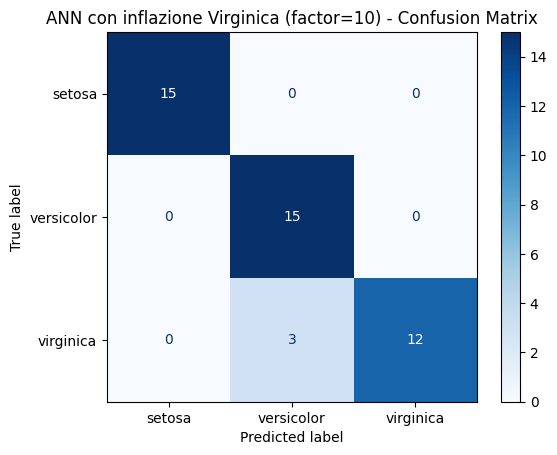

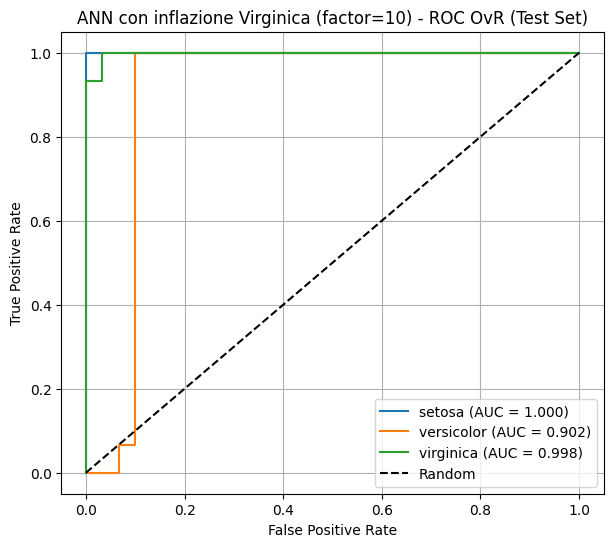

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# =====================================================
# 2) Split train/test PRIMA dell’oversampling
# =====================================================
# - faccio lo split prima, così nel test non finiranno MAI copie di esempi oversamplati.
# - uso stratify=y per mantenere la distribuzione delle classi nel test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Training set originale:", len(X_train))
print("Test set:", len(X_test))

# =====================================================
# 3) Oversampling (inflazione) della classe Virginica x10
# =====================================================
# Nel dataset Iris:
# - 0 = setosa
# - 1 = versicolor
# - 2 = virginica
virginica_label = 2
factor = 10

# Indici degli esempi Virginica nel training set
idx_vir = np.where(y_train == virginica_label)[0]

# Estraggo i campioni Virginica dal training
X_vir = X_train[idx_vir]
y_vir = y_train[idx_vir]

# Creo copie dei campioni Virginica
# Uso np.repeat: duplico ogni esempio Virginica per "factor" volte.
X_vir_inflated = np.repeat(X_vir, repeats=factor, axis=0)
y_vir_inflated = np.repeat(y_vir, repeats=factor, axis=0)

# Costruisco il nuovo training set aumentato:
# - tengo tutti i campioni originali
# - aggiungo le copie Virginica
X_train_inflated = np.vstack([X_train, X_vir_inflated])
y_train_inflated = np.concatenate([y_train, y_vir_inflated])

print("Training set dopo inflazione:", len(X_train_inflated))

# =========================
# 4) Definisco la ANN (MLP) con Pipeline
# =========================
pipeline_ANN = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        solver="lbfgs",
        alpha=1e-5,
        hidden_layer_sizes=(5, 2),
        random_state=1,
        max_iter=2000
    ))
])

# =========================
# 5) Addestro la rete sul training "inflated"
# =========================
pipeline_ANN.fit(X_train_inflated, y_train_inflated)

# =========================
# 6) Valuto sul test set (NON alterato)
# =========================
y_pred = pipeline_ANN.predict(X_test)
y_proba = pipeline_ANN.predict_proba(X_test)

# =========================
# 7) Confusion Matrix
# =========================
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("ANN con inflazione Virginica (factor=10) - Confusion Matrix")
plt.show()

# =========================
# 8) ROC curve One-vs-Rest (3 curve)
# =========================
plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    # Classe i positiva, altre negative
    y_true_bin = (y_test == i).astype(int)
    y_score = y_proba[:, i]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ANN con inflazione Virginica (factor=10) - ROC OvR (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


# 4. As an alternative to step 3, modify instead the weight of the Virginica class (set to 10 the weight for misclassification of Virginica) and learn the ANN in this condition. You should obtain similar results as for step 3.

Training set: 105
Test set: 45
Numero Virginica nel training: 35
Peso assegnato a Virginica: 10.0


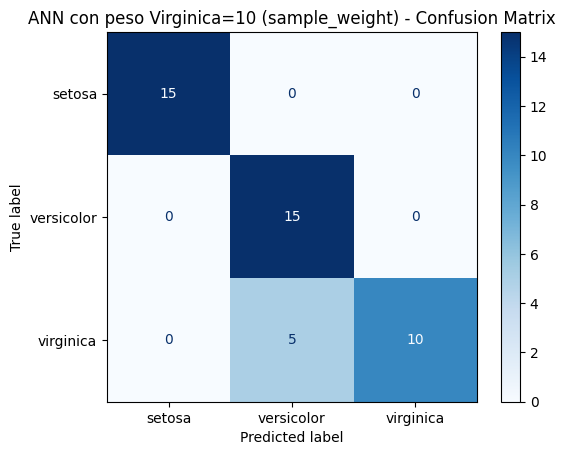

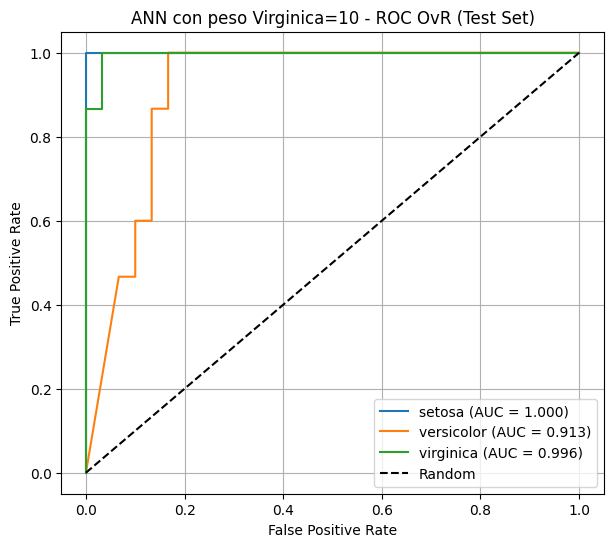

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# =====================================================
# 2) Split train/test (prima di tutto!)
# =====================================================
#   Lo split lo faccio PRIMA di qualunque “trucco” (oversampling o pesi),
#   così il test set resta pulito e non contiene dati “influenzati” dal training.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Training set:", len(X_train))
print("Test set:", len(X_test))

# =====================================================
# 3) Definisco i pesi per i campioni (sample_weight)
# =====================================================
# Nel dataset Iris:
# - 0 = setosa
# - 1 = versicolor
# - 2 = virginica
# Voglio che gli errori su Virginica “costino” 10 volte di più.
virginica_label = 2
virginica_weight = 10.0

# Creo un vettore di pesi per ogni campione del training:
# - peso = 10 se è Virginica
# - peso = 1 altrimenti
sample_weight_train = np.ones_like(y_train, dtype=float)
sample_weight_train[y_train == virginica_label] = virginica_weight

print("Numero Virginica nel training:", np.sum(y_train == virginica_label))
print("Peso assegnato a Virginica:", virginica_weight)

# =========================
# 4) Definisco la ANN in Pipeline
# =========================
pipeline_ANN = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        solver="lbfgs",
        alpha=1e-5,
        hidden_layer_sizes=(5, 2),
        random_state=1,
        max_iter=2000
    ))
])

# =========================
# 5) Addestro la rete con sample_weight
# =========================
# Dato che sto usando la pipeline (visto che senza non funziona), la doc mi dice che invece di usare .fit(X,y,sample_weight...), uso pipeline.fit(X,y,mlp__sample_weight)
pipeline_ANN.fit(X_train, y_train, mlp__sample_weight=sample_weight_train)

# =========================
# 6) Valuto sul test set (non alterato)
# =========================
y_pred = pipeline_ANN.predict(X_test)
y_proba = pipeline_ANN.predict_proba(X_test)

# =========================
# 7) Confusion Matrix
# =========================
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("ANN con peso Virginica=10 (sample_weight) - Confusion Matrix")
plt.show()

# =========================
# 8) ROC curve One-vs-Rest (3 curve)
# =========================
plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    # Considero la classe i come positiva, le altre come negative
    y_true_bin = (y_test == i).astype(int)
    y_score = y_proba[:, i]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ANN con peso Virginica=10 - ROC OvR (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


# 5. learn the ANN but try to avoid overfitting (by improving the error on the test set). You can do tuning of the hyper-parameters using the function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Miglior F1 macro in CV: 0.9904273504273504
Migliori iperparametri trovati:
{'mlp__activation': 'tanh', 'mlp__alpha': 1e-06, 'mlp__hidden_layer_sizes': (10,), 'mlp__max_iter': 2000, 'mlp__solver': 'lbfgs'}

Accuracy su test: 0.8888888888888888

Classification report su test:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.75      1.00      0.86        15
   virginica       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.92      0.89      0.89        45
weighted avg       0.92      0.89      0.89        45



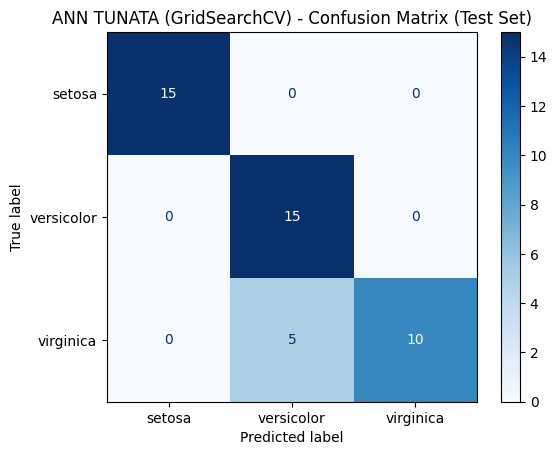

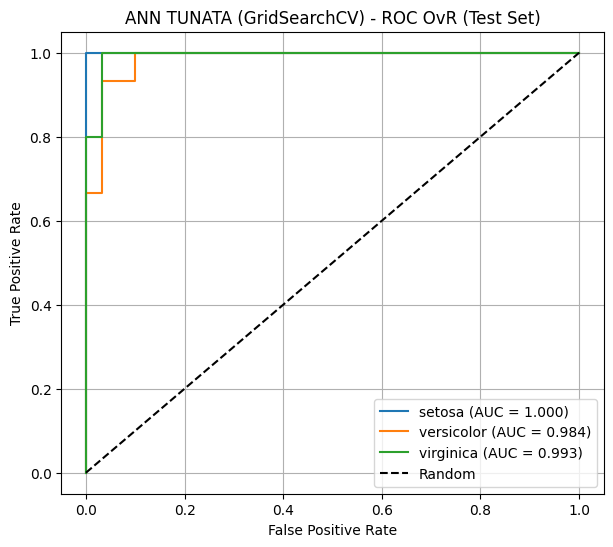

In [7]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc
)

# =========================
# 1) Carico il dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# =========================
# 2) Split train/test
# =========================
# Tengo un test set "pulito" che userò solo alla fine.
# Il tuning (GridSearchCV) lo faccio solo sul training set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# =========================
# 3) Pipeline: scaling + MLP
# =========================
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        random_state=1
        # max_iter/solver/architettura verranno scelti dal GridSearchCV
    ))
])

# ==========================================================
# 4) Scelgo una griglia "ragionevole" di iperparametri
# ==========================================================
# Obiettivo: evitare overfitting e trovare un buon compromesso bias/varianza.

# Griglia per solver = lbfgs
# - lbfgs spesso funziona bene su dataset piccoli
# - early_stopping e batch_size non sono rilevanti qui
param_grid_lbfgs = {
    "mlp__solver": ["lbfgs"],
    "mlp__hidden_layer_sizes": [(5, 2), (10,), (20,), (10, 5)],
    "mlp__activation": ["tanh", "relu", "logistic"],
    "mlp__alpha": [1e-6, 1e-5, 1e-4, 1e-3],
    "mlp__max_iter": [2000, 4000]
}

# Griglia per solver = adam
# - qui posso usare batch_size e early_stopping
param_grid_adam = {
    "mlp__solver": ["adam"],
    "mlp__hidden_layer_sizes": [(10,), (20,), (30,), (10, 10)],
    "mlp__activation": ["tanh", "relu"],
    "mlp__alpha": [1e-6, 1e-5, 1e-4, 1e-3],
    "mlp__batch_size": [16, 32, 64],
    "mlp__learning_rate": ["constant", "adaptive"],
    "mlp__early_stopping": [True, False],
    "mlp__warm_start": [False],   # warm_start di solito non serve per GridSearchCV
    "mlp__max_iter": [2000, 4000]
}

# Griglia per solver = sgd
# - richiede attenzione a learning_rate ed è più instabile senza scaling
param_grid_sgd = {
    "mlp__solver": ["sgd"],
    "mlp__hidden_layer_sizes": [(10,), (20,), (10, 10)],
    "mlp__activation": ["tanh", "relu"],
    "mlp__alpha": [1e-6, 1e-5, 1e-4, 1e-3],
    "mlp__batch_size": [16, 32, 64],
    "mlp__learning_rate": ["constant", "invscaling", "adaptive"],
    "mlp__early_stopping": [True, False],
    "mlp__warm_start": [False],
    "mlp__max_iter": [4000]       # SGD spesso richiede più iterazioni
}

# Unisco le griglie: GridSearchCV proverà tutte le combinazioni,
# ma rispettando i gruppi (evito combinazioni inutili).
param_grid = [param_grid_lbfgs, param_grid_adam, param_grid_sgd]

# ==========================================================
# 5) GridSearchCV: tuning con cross-validation sul training
# ==========================================================
# - cv=5: 5-fold CV
# - scoring: f1_macro è adatto per multiclass e valuta tutte le classi in modo bilanciato
# - n_jobs=-1: sfrutta tutti i core
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=1,
    refit=True,   # rifitta automaticamente il best model su tutto il training set
    verbose=1
)

grid.fit(X_train, y_train)

print("Miglior F1 macro in CV:", grid.best_score_)
print("Migliori iperparametri trovati:")
print(grid.best_params_)

best_model = grid.best_estimator_

# ==========================================================
# 6) Valutazione finale sul test set (mai visto durante tuning)
# ==========================================================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

print("\nAccuracy su test:", accuracy_score(y_test, y_pred))
print("\nClassification report su test:")
print(classification_report(y_test, y_pred, target_names=class_names))

# =========================
# 7) Confusion Matrix
# =========================
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_names,
    cmap="Blues"
)
plt.title("ANN TUNATA (GridSearchCV) - Confusion Matrix (Test Set)")
plt.show()

# =========================
# 8) ROC curve One-vs-Rest (3 curve)
# =========================
# Per ROC multiclasse:
# - binarizzo y_test in OvR
# - uso le probabilità predette per ogni classe
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(7, 6))

for i, name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ANN TUNATA (GridSearchCV) - ROC OvR (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


# 6. build the ROC curves of best models (obtained after hyperparameter tuning) for both DT and ANN for each of the three classes (with *one-vs-rest* methodology). Compare the two models.

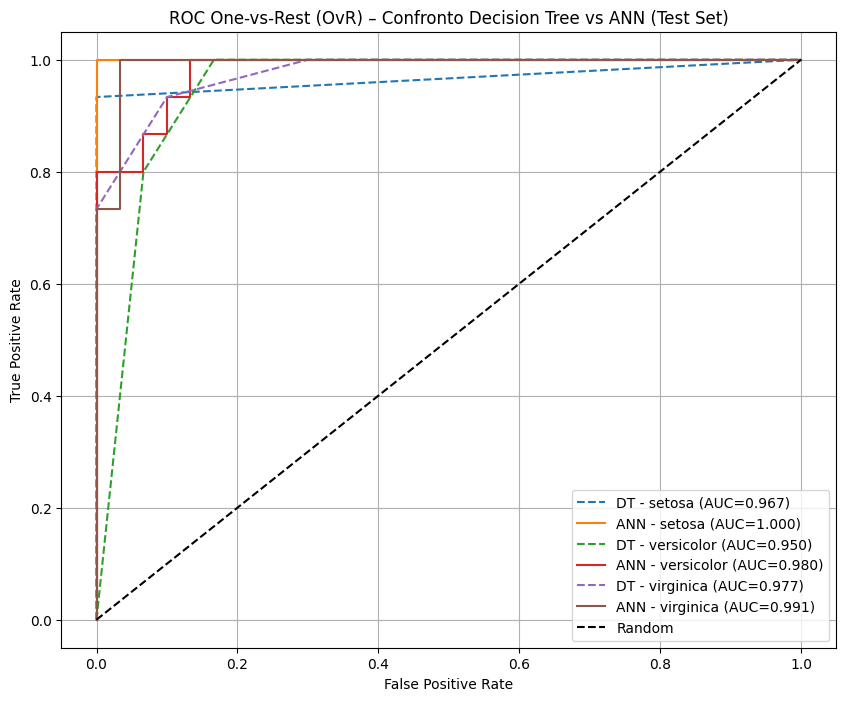


AUC per classe (DT vs ANN):
- setosa     | DT AUC = 0.967 | ANN AUC = 1.000
- versicolor | DT AUC = 0.950 | ANN AUC = 0.980
- virginica  | DT AUC = 0.977 | ANN AUC = 0.991


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc


# ==========================================================
# 1) Carico dataset e creo train/test (test set pulito)
# ==========================================================
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# Split stratificato: mantengo la stessa proporzione di classi in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# ==========================================================
# 2) Ricostruisco e addestro il Decision Tree con i migliori iperparametri
# ==========================================================
best_params_dt = {
    'ccp_alpha': 0.0,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'splitter': 'random'
}

dt_best = DecisionTreeClassifier(
    random_state=42,
    **best_params_dt
)

# Alleno sul training set
dt_best.fit(X_train, y_train)

# Probabilità sul test set (servono per ROC OvR)
y_proba_dt = dt_best.predict_proba(X_test)  # shape: (n_test, 3)


# ==========================================================
# 3) Ricostruisco e addestro la ANN (MLP) con i migliori iperparametri
# ==========================================================
best_params_ann = {
    'mlp__activation': 'tanh',
    'mlp__alpha': 1e-06,
    'mlp__hidden_layer_sizes': (10,),
    'mlp__max_iter': 2000,
    'mlp__solver': 'lbfgs'
}

ann_best = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        random_state=42
    ))
])

# Imposto i migliori iperparametri trovati dal tuning
ann_best.set_params(**best_params_ann)

# Alleno sul training set
ann_best.fit(X_train, y_train)

# Probabilità sul test set (servono per ROC OvR)
y_proba_ann = ann_best.predict_proba(X_test)  # shape: (n_test, 3)


# ==========================================================
# 4) Preparo il target binario per One-vs-Rest (OvR)
# ==========================================================
# Trasformo y_test in matrice binaria:
# colonna i = 1 se classe i, altrimenti 0
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # shape: (n_test, 3)


# ==========================================================
# 5) Costruisco e plotto le ROC curve: confronto DT vs ANN
# ==========================================================
# Per ogni classe:
# - considero la classe i come "positiva"
# - uso come score la probabilità predetta di quella classe
# - calcolo ROC e AUC
plt.figure(figsize=(10, 8))

for i, name in enumerate(class_names):
    # ---- Decision Tree ----
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
    auc_dt = auc(fpr_dt, tpr_dt)

    # ---- ANN ----
    fpr_ann, tpr_ann, _ = roc_curve(y_test_bin[:, i], y_proba_ann[:, i])
    auc_ann = auc(fpr_ann, tpr_ann)

    # Plot: per ogni classe disegno due curve (DT tratteggiata, ANN continua)
    plt.plot(
        fpr_dt, tpr_dt,
        linestyle="--",
        label=f"DT - {name} (AUC={auc_dt:.3f})"
    )
    plt.plot(
        fpr_ann, tpr_ann,
        linestyle="-",
        label=f"ANN - {name} (AUC={auc_ann:.3f})"
    )

# Linea baseline casuale (AUC ~ 0.5)
plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC One-vs-Rest (OvR) – Confronto Decision Tree vs ANN (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


# ==========================================================
# 6) (Opzionale) Stampo una mini tabella AUC per classe
# ==========================================================
print("\nAUC per classe (DT vs ANN):")
for i, name in enumerate(class_names):
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
    auc_dt = auc(fpr_dt, tpr_dt)

    fpr_ann, tpr_ann, _ = roc_curve(y_test_bin[:, i], y_proba_ann[:, i])
    auc_ann = auc(fpr_ann, tpr_ann)

    print(f"- {name:10s} | DT AUC = {auc_dt:.3f} | ANN AUC = {auc_ann:.3f}")
